#Metropolis-Hastings algorithm

It construct a Markov chain on X that is ergodic and stationary with respect to π therefore converges in distribution to π


## References

- [1] [The  Metropolis–Hastings algorithm](https://arxiv.org/pdf/1504.01896.pdf)
- [2] [The Best of the 20th Century: Editors Name Top 10  Algorithms](http://www.uta.edu/faculty/rcli/TopTen/topten.pdf)

/home/marcofavorito/.virtualenvs/ML-from-scratch/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


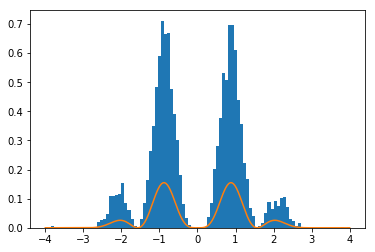

In [40]:


def uniform(x, alpha):
    return np.random.uniform(x-alpha, x+alpha)

# proposal 1: uniform between (x-alpha, x+alpha)
def proposal_1(alpha=0.5):
    return lambda x: uniform(x, alpha) 

# Metropolis algorithm implementation
def metropolis(x, prob_dist):
    y = prob_dist(x)
    k = min(target_distribution(y) / target_distribution(x), 1)
    if np.random.random() < k:
        res = y
    else:
        res = x
        
    return res


T = 10000
prob_dist = proposal_1(2.0)
xs = np.zeros(T)
for t in range(1, T):
    xs[t] = metropolis(xs[t-1], prob_dist)
    
plt.hist(xs, 100, range=(-4, 4), density=True)
plt.plot(np.linspace(-4, 4, 200), X)
plt.show()

## References

- [1] [The  Metropolis–Hastings algorithm](https://arxiv.org/pdf/1504.01896.pdf)
- [2] [The Best of the 20th Century: Editors Name Top 10  Algorithms](http://www.uta.edu/faculty/rcli/TopTen/topten.pdf)